In [12]:
import numpy as np
import pandas as pd
import json
from epilepsypcm.utils.outcome_params import node_location

all_positive_patients = pd.read_csv("newDF.csv", sep = ',').reset_index(drop = True)

In [13]:
print(all_positive_patients["outcome"].value_counts())
all_positive_patients.head()


0.0    291
1.0     76
Name: outcome, dtype: int64


,Unnamed: 0,Channels,outcome,IZ,EP,SigResp,SigStim,N1RespAvg,N1RespSDV,N2RespAvg,...,N1StimSDV,N2StimAvg,N2StimSDV,P2StimAvg,P2StimSDV,patient,InDegree,OutDegree,EV,Closeness
0,0,LA9_LA10,0.0,1.0,0.0,0.000000,0.250000,1.530459,1.134169,2.040546,...,10.790559,6.536859,6.383906,5.785279,7.331337,PY21N008,0.00,0.24,5.165334e-14,0.000000
1,1,LAH1_LAH2,1.0,1.0,0.0,0.076923,0.250000,7.062089,20.678040,3.320937,...,16.334814,4.921208,3.029861,2.352152,1.803711,PY21N008,0.08,0.24,7.960607e-04,0.177778
2,2,LAH8_LAH9,0.0,0.0,0.0,0.307692,0.125000,4.032683,2.995624,3.450575,...,2.164878,2.190308,1.489418,2.033410,2.112725,PY21N008,0.32,0.12,1.590588e-01,0.484848
3,3,LPH1_LPH2,0.0,1.0,0.0,0.115385,0.333333,6.522655,17.219698,3.369771,...,8.264811,4.630948,3.574869,4.187831,3.626223,PY21N008,0.12,0.32,4.743270e-03,0.222222
4,4,LPH7_LPH8,0.0,0.0,0.0,0.307692,0.083333,7.304854,10.728727,4.610356,...,2.925869,1.606341,1.075715,1.461462,1.012732,PY21N008,0.32,0.08,1.857524e-01,0.484848


In [14]:
from epilepsypcm.utils.make_df import make_df, get_df_list, concat_dfs
from epilepsypcm.models.base_models import *
from sklearn.metrics import auc

# One node was stimuated by a bunch of nodes, here is its aggregate response - effect of network ON node

In [15]:
X_list = ["Channels", "SigResp", "N1RespAvg", "N1RespSDV", "N2RespAvg", "N2RespSDV", "P2RespAvg", "P2RespSDV"]

Random Forest - Number of mislabeled points out of a total 92 points : 19


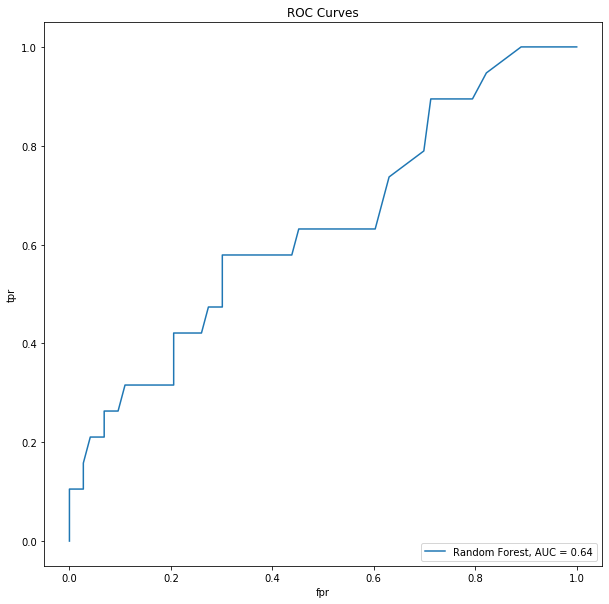

In [19]:
# resp channels

plot_roc = False
plot_pr = False

plt.figure(figsize = (10,10))
plt.title("ROC Curves")
plt.xlabel("fpr")
plt.ylabel("tpr")

#random forest
max_depth = 15
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "Random Forest, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')




Logistic Regression - Number of mislabeled points out of a total 92 points : 19
Naive Bayes - Number of mislabeled points out of a total 92 points : 34
Random Forest - Number of mislabeled points out of a total 92 points : 18
XGBoost - Number of mislabeled points out of a total 92 points : 21
Adaboost - Number of mislabeled points out of a total 92 points : 17
SVM - Number of mislabeled points out of a total 92 points : 19


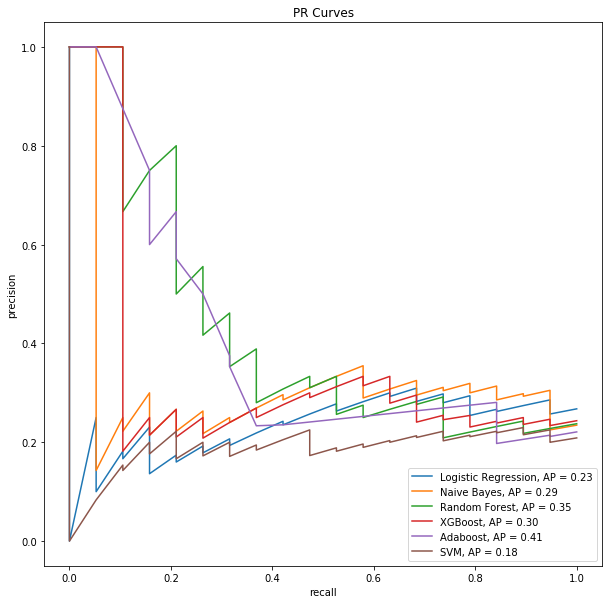

In [11]:
plot_roc = False
plot_pr = False

plt.figure(figsize = (10,10))
plt.title("PR Curves")
plt.xlabel("recall")
plt.ylabel("precision")

#logistic regression
lr, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = logistic_regression(all_positive_patients, X_list, plot_roc, plot_pr)
plt.plot(recall, precision, label='Logistic Regression, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#naive bayes
gnb, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = naive_bayes(all_positive_patients, X_list, plot_roc, plot_pr)
plt.plot(recall, precision, label='Naive Bayes, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#random forest
max_depth = 10
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr)
plt.plot(recall, precision, label='Random Forest, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#xgboost
learning_rate = 0.5
max_depth = 10
n_estimators = 10
xgb, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = xgboost(all_positive_patients, X_list, learning_rate, max_depth, n_estimators, plot_roc, plot_pr)
plt.plot(recall, precision, label='XGBoost, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#adaboost
n_estimators = 10
ada, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = adaboost(all_positive_patients, X_list, n_estimators, plot_roc, plot_pr)
plt.plot(recall, precision, label='Adaboost, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#svm
C = 0.7
epsilon = 0.2
sv, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = svm(all_positive_patients, X_list, C, epsilon, plot_roc, plot_pr)
plt.plot(recall, precision, label='SVM, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

# One node stimulated a lot of different nodes, here are their aggregate responses - effect of node ON network

In [66]:
X_list = ["Channels","SigStim", "N1StimAvg", "N1StimSDV", "N2StimAvg", "N2StimSDV", "P2StimAvg", "P2StimSDV"]


Logistic Regression - Number of mislabeled points out of a total 78 points : 17
Naive Bayes - Number of mislabeled points out of a total 78 points : 38
Random Forest - Number of mislabeled points out of a total 78 points : 16
[23:27:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:27:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost - Number of mislabeled points out of a total 78 points : 16
Adaboost - Number of mislabeled points out of a total 78 points : 14
SVM - Number of mislabeled points out of a total 78 points : 16


/Users/shrey2/opt/anaconda3/envs/pcm/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


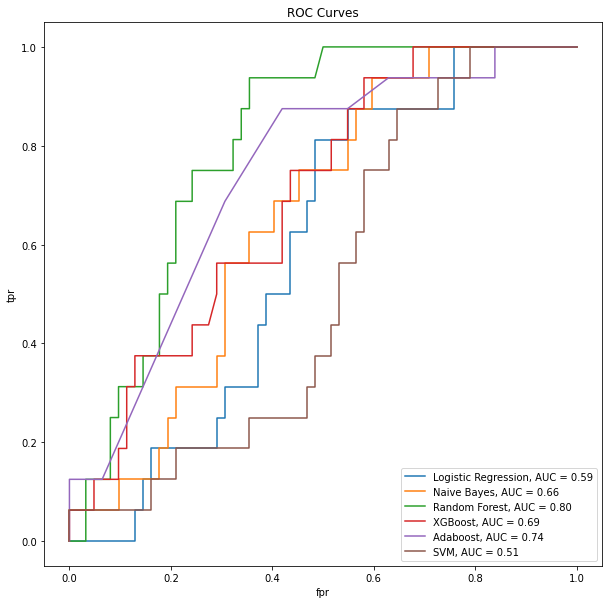

In [67]:
# stim channels

plot_roc = False
plot_pr = False

plt.figure(figsize = (10,10))
plt.title("ROC Curves")
plt.xlabel("fpr")
plt.ylabel("tpr")

#logistic regression
lr, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = logistic_regression(all_positive_patients, X_list, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "Logistic Regression, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#naive bayes
gnb, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = naive_bayes(all_positive_patients, X_list, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "Naive Bayes, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#random forest
max_depth = 10
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "Random Forest, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#xgboost
learning_rate = 0.5
max_depth = 10
n_estimators = 10
xgb, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = xgboost(all_positive_patients, X_list, learning_rate, max_depth, n_estimators, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "XGBoost, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#adaboost
n_estimators = 10
ada, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = adaboost(all_positive_patients, X_list, n_estimators, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "Adaboost, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#svm
C = 0.7
epsilon = 0.2
sv, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = svm(all_positive_patients, X_list, C, epsilon, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "SVM, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')



Logistic Regression - Number of mislabeled points out of a total 78 points : 17
Naive Bayes - Number of mislabeled points out of a total 78 points : 38
Random Forest - Number of mislabeled points out of a total 78 points : 16
[23:27:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:27:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost - Number of mislabeled points out of a total 78 points : 16
Adaboost - Number of mislabeled points out of a total 78 points : 14
SVM - Number of mislabeled points out of a total 78 points : 16


/Users/shrey2/opt/anaconda3/envs/pcm/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


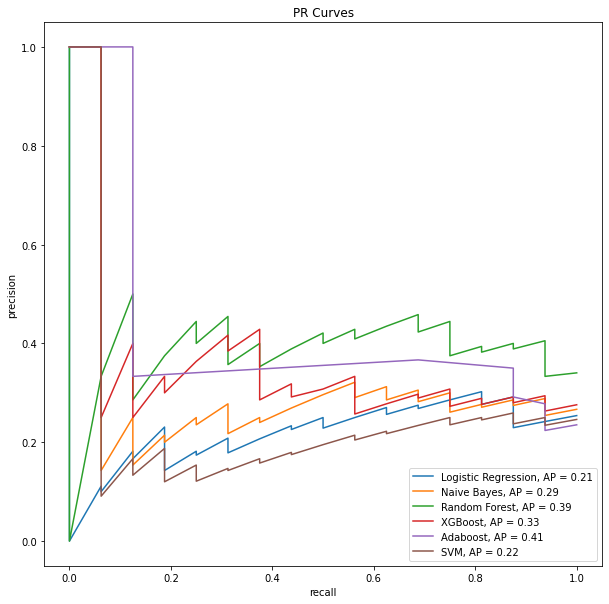

In [68]:
plot_roc = False
plot_pr = False

plt.figure(figsize = (10,10))
plt.title("PR Curves")
plt.xlabel("recall")
plt.ylabel("precision")

#logistic regression
lr, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = logistic_regression(all_positive_patients, X_list, plot_roc, plot_pr)
plt.plot(recall, precision, label='Logistic Regression, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#naive bayes
gnb, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = naive_bayes(all_positive_patients, X_list, plot_roc, plot_pr)
plt.plot(recall, precision, label='Naive Bayes, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#random forest
max_depth = 10
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr)
plt.plot(recall, precision, label='Random Forest, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#xgboost
learning_rate = 0.5
max_depth = 10
n_estimators = 10
xgb, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = xgboost(all_positive_patients, X_list, learning_rate, max_depth, n_estimators, plot_roc, plot_pr)
plt.plot(recall, precision, label='XGBoost, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#adaboost
n_estimators = 10
ada, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = adaboost(all_positive_patients, X_list, n_estimators, plot_roc, plot_pr)
plt.plot(recall, precision, label='Adaboost, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#svm
C = 0.7
epsilon = 0.2
sv, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = svm(all_positive_patients, X_list, C, epsilon, plot_roc, plot_pr)
plt.plot(recall, precision, label='SVM, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

# Effect of network ON node AND effect of node ON network

In [69]:
X_list = ["Channels","SigResp", "N1RespAvg", "N1RespSDV", "N2RespAvg", "N2RespSDV", "P2RespAvg", "P2RespSDV", 
          "SigStim", "N1StimAvg", "N1StimSDV", "N2StimAvg", "N2StimSDV", "P2StimAvg", "P2StimSDV"]


/Users/shrey2/opt/anaconda3/envs/pcm/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shrey2/opt/anaconda3/envs/pcm/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, U

Logistic Regression - Number of mislabeled points out of a total 78 points : 17
Naive Bayes - Number of mislabeled points out of a total 78 points : 36
Random Forest - Number of mislabeled points out of a total 78 points : 15
[23:27:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:27:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost - Number of mislabeled points out of a total 78 points : 15
Adaboost - Number of mislabeled points out of a total 78 points : 14
SVM - Number of mislabeled points out of a total 78 points : 16


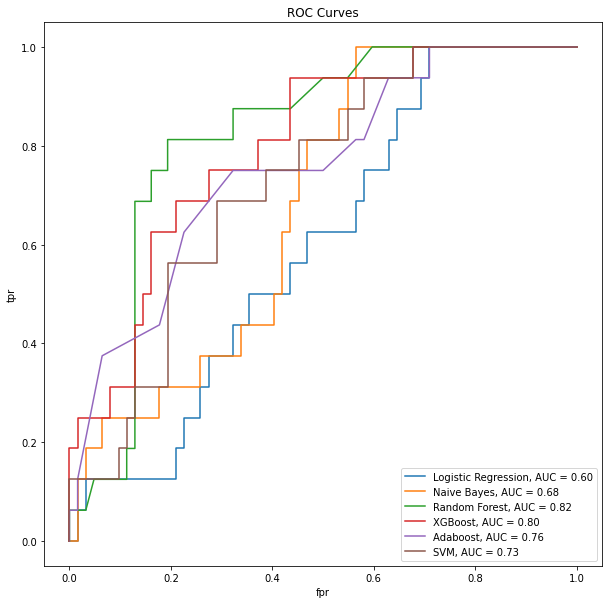

In [70]:
# stim + resp channels

plot_roc = False
plot_pr = False

plt.figure(figsize = (10,10))
plt.title("ROC Curves")
plt.xlabel("fpr")
plt.ylabel("tpr")

#logistic regression
lr, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = logistic_regression(all_positive_patients, X_list, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "Logistic Regression, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#naive bayes
gnb, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = naive_bayes(all_positive_patients, X_list, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "Naive Bayes, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#random forest
max_depth = 10
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "Random Forest, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#xgboost
learning_rate = 0.5
max_depth = 10
n_estimators = 10
xgb, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = xgboost(all_positive_patients, X_list, learning_rate, max_depth, n_estimators, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "XGBoost, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#adaboost
n_estimators = 10
ada, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = adaboost(all_positive_patients, X_list, n_estimators, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "Adaboost, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')

#svm
C = 0.7
epsilon = 0.2
sv, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = svm(all_positive_patients, X_list, C, epsilon, plot_roc, plot_pr)
plt.plot(fpr, tpr, label = "SVM, AUC = %0.2f" % auc(fpr, tpr))
plt.legend(loc='lower right')



/Users/shrey2/opt/anaconda3/envs/pcm/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shrey2/opt/anaconda3/envs/pcm/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, U

Logistic Regression - Number of mislabeled points out of a total 78 points : 17
Naive Bayes - Number of mislabeled points out of a total 78 points : 36
Random Forest - Number of mislabeled points out of a total 78 points : 15
[23:27:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:27:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost - Number of mislabeled points out of a total 78 points : 15
Adaboost - Number of mislabeled points out of a total 78 points : 14
SVM - Number of mislabeled points out of a total 78 points : 16


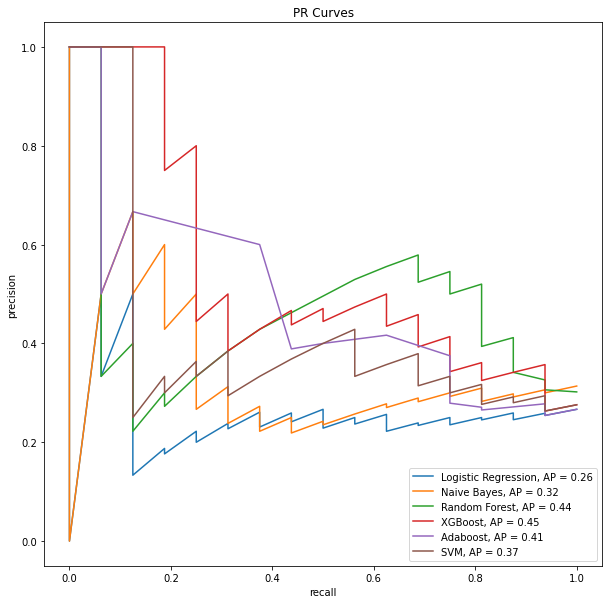

In [71]:
plot_roc = False
plot_pr = False

plt.figure(figsize = (10,10))
plt.title("PR Curves")
plt.xlabel("recall")
plt.ylabel("precision")

#logistic regression
lr, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = logistic_regression(all_positive_patients, X_list, plot_roc, plot_pr)
plt.plot(recall, precision, label='Logistic Regression, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#naive bayes
gnb, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = naive_bayes(all_positive_patients, X_list, plot_roc, plot_pr)
plt.plot(recall, precision, label='Naive Bayes, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#random forest
max_depth = 10
rf, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr)
plt.plot(recall, precision, label='Random Forest, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#xgboost
learning_rate = 0.5
max_depth = 10
n_estimators = 10
xgb, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = xgboost(all_positive_patients, X_list, learning_rate, max_depth, n_estimators, plot_roc, plot_pr)
plt.plot(recall, precision, label='XGBoost, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#adaboost
n_estimators = 10
ada, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = adaboost(all_positive_patients, X_list, n_estimators, plot_roc, plot_pr)
plt.plot(recall, precision, label='Adaboost, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

#svm
C = 0.7
epsilon = 0.2
sv, y_pred, test_channels, y_test, tpr, fpr, roc_thresholds, precision, recall = svm(all_positive_patients, X_list, C, epsilon, plot_roc, plot_pr)
plt.plot(recall, precision, label='SVM, AP = %0.2f' % (np.mean(precision)))
plt.legend(loc='lower right')

### stats for model on stim and response columns

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
#Logistic regression

lr, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = logistic_regression(all_positive_patients, X_list, plot_roc, plot_pr)
optimal_thresh = roc_thresholds[np.argmax(tpr - fpr)]
y_rounded = np.where(y_pred > optimal_thresh, 1, 0)

tn, fp, fn, tp = confusion_matrix(y_test, y_rounded).ravel()

print("Accuracy: ", (tp + tn)/(tp + fp + tn + fn))
print("Sensitivity: ", tp / (tp + fn))
print("Specificity: ", tn / (tn + fp))

Logistic Regression - Number of mislabeled points out of a total 78 points : 17
Accuracy:  0.4230769230769231
Sensitivity:  0.9375
Specificity:  0.2903225806451613


/Users/shrey2/opt/anaconda3/envs/pcm/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
#Naive Bayes

gnb, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = naive_bayes(all_positive_patients, X_list, plot_roc, plot_pr)
optimal_thresh = roc_thresholds[np.argmax(tpr - fpr)]
y_rounded = np.where(y_pred > optimal_thresh, 1, 0)

tn, fp, fn, tp = confusion_matrix(y_test, y_rounded).ravel()

print("Accuracy: ", (tp + tn)/(tp + fp + tn + fn))
print("Sensitivity: ", tp / (tp + fn))
print("Specificity: ", tn / (tn + fp))

Naive Bayes - Number of mislabeled points out of a total 78 points : 36
Accuracy:  0.5384615384615384
Sensitivity:  0.9375
Specificity:  0.43548387096774194


In [19]:
#Random Forest

max_depth = 10
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr)
optimal_thresh = roc_thresholds[np.argmax(tpr - fpr)]
y_rounded = np.where(y_pred > optimal_thresh, 1, 0)

tn, fp, fn, tp = confusion_matrix(y_test, y_rounded).ravel()

print("Accuracy: ", (tp + tn)/(tp + fp + tn + fn))
print("Sensitivity: ", tp / (tp + fn))
print("Specificity: ", tn / (tn + fp))

Random Forest - Number of mislabeled points out of a total 78 points : 15
Accuracy:  0.7948717948717948
Sensitivity:  0.75
Specificity:  0.8064516129032258


In [20]:
#XGBoost

learning_rate = 0.5
max_depth = 10
n_estimators = 10
xgb, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = xgboost(all_positive_patients, X_list, learning_rate, max_depth, n_estimators, plot_roc, plot_pr)
y_rounded = np.where(y_pred > optimal_thresh, 1, 0)

tn, fp, fn, tp = confusion_matrix(y_test, y_rounded).ravel()

print("Accuracy: ", (tp + tn)/(tp + fp + tn + fn))
print("Sensitivity: ", tp / (tp + fn))
print("Specificity: ", tn / (tn + fp))



[23:13:29] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:13:29] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost - Number of mislabeled points out of a total 78 points : 15
Accuracy:  0.782051282051282
Sensitivity:  0.4375
Specificity:  0.8709677419354839


/Users/shrey2/opt/anaconda3/envs/pcm/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [21]:
#Adaboost

n_estimators = 10
ada, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = adaboost(all_positive_patients, X_list, n_estimators, plot_roc, plot_pr)
y_rounded = np.where(y_pred > optimal_thresh, 1, 0)

tn, fp, fn, tp = confusion_matrix(y_test, y_rounded).ravel()

print("Accuracy: ", (tp + tn)/(tp + fp + tn + fn))
print("Sensitivity: ", tp / (tp + fn))
print("Specificity: ", tn / (tn + fp))



Adaboost - Number of mislabeled points out of a total 78 points : 14
Accuracy:  0.48717948717948717
Sensitivity:  0.9375
Specificity:  0.3709677419354839


In [22]:
#SVM

C = 0.7
epsilon = 0.2
sv, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = svm(all_positive_patients, X_list, C, epsilon, plot_roc, plot_pr)
y_rounded = np.where(y_pred > optimal_thresh, 1, 0)

tn, fp, fn, tp = confusion_matrix(y_test, y_rounded).ravel()

print("Accuracy: ", (tp + tn)/(tp + fp + tn + fn))
print("Sensitivity: ", tp / (tp + fn))
print("Specificity: ", tn / (tn + fp))


SVM - Number of mislabeled points out of a total 78 points : 16
Accuracy:  0.5384615384615384
Sensitivity:  0.875
Specificity:  0.45161290322580644


# Boxplots for models

In [61]:
import seaborn as sns


## Logistic Regression

Logistic Regression - Number of mislabeled points out of a total 78 points : 17
Optimal roc threshold:  0.00769697071604118
Accuracy:  0.4230769230769231
Sensitivity:  0.9375
Specificity:  0.2903225806451613


Positive labels
left basal temporal
Left orbitofrontal depth
Left inferior frontal
Right anterior hippocampus
Left fronto-temporal grid
Left inferior posterior frontal depth
Right anterior hippocampus
Left fronto-temporal grid
Right amygdala depth
right posterior hippocampus
Right anterior temporal inferior
Left medial frontal depth
Left fronto-temporal grid
Left temporal grid
Right anterior hippocampus
Right anterior temporal inferior


Negative labels
left posterior hippocampus
Left amygdala depth
Left lateral lesion 2
Basal temporal posterior-temporal
Left posterior nodule depth
Right medial superior (medial)
Left retro-splenial cingulate
Left anterior superior temporal gyrus
Left amygdala depth
Left fronto-temporal grid
Basal temporal mid-temporal
Left insula
right posterior 

/Users/shrey2/opt/anaconda3/envs/pcm/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:title={'center':'Logistic Regression boxplots'}, xlabel='non_SOZ                                                                               SOZ', ylabel='P(SOZ)'>

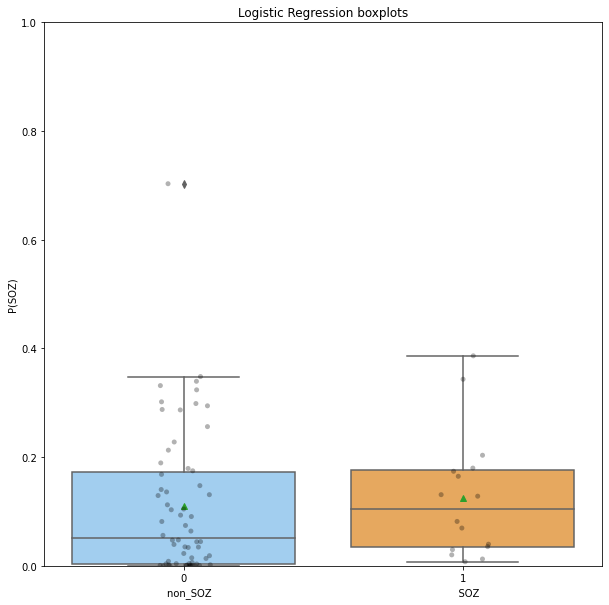

In [80]:
#Logistic regression

lr, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = logistic_regression(all_positive_patients, X_list, plot_roc, plot_pr)

# Printing Metrics
optimal_thresh = roc_thresholds[np.argmax(tpr - fpr)]
print("Optimal roc threshold: ", optimal_thresh)
y_rounded = np.where(y_pred > optimal_thresh, 1, 0)

tn, fp, fn, tp = confusion_matrix(y_test, y_rounded).ravel()

print("Accuracy: ", (tp + tn)/(tp + fp + tn + fn))
print("Sensitivity: ", tp / (tp + fn))
print("Specificity: ", tn / (tn + fp))


# Plotting boxplot
non_epilepsy = []
channels_non = []
epilepsy_normal = []
channels_normal = []

i = 0
while i < len(y_test):
    if list(y_test)[i] == 1.0:
        epilepsy_normal.append(y_pred[i])
        channels_normal.append(test_channels[i])
    elif list(y_test)[i] == 0.0:
        non_epilepsy.append(y_pred[i])
        channels_non.append(test_channels[i])
    i += 1

channels_normal = [x for _,x in sorted(zip(epilepsy_normal, channels_normal), reverse = True)]

pos_labels = []
for channel in channels_normal:
    channel = ''.join(i for i in channel if not i.isdigit()) #dropping digits from channel name
    channel_split = channel.split("_")
    for key in node_location.keys():
        if (channel_split[0] == key) | (channel_split[1] == key):
            pos_labels.append(node_location[key])

neg_labels = []
for channel in channels_non:
    channel = ''.join(i for i in channel if not i.isdigit()) #dropping digits from channel name
    channel_split = channel.split("_")
    for key in node_location.keys():
        if (channel_split[0] == key) | (channel_split[1] == key):
            neg_labels.append(node_location[key])

print("\n")
print("Positive labels")            
print(*pos_labels, sep = "\n")

print("\n")
print("Negative labels")
print(*neg_labels, sep = "\n")

    
plt.figure(figsize = (10, 10))
plt.title("Logistic Regression boxplots")
plt.xlabel("non_SOZ                                                                               SOZ")
plt.ylabel("P(SOZ)")
plt.ylim([0,1])

sns.boxplot(
    data=[non_epilepsy, epilepsy_normal],
    palette=[sns.xkcd_rgb["light blue"], sns.xkcd_rgb["light orange"]],
    showmeans=True,
)

sns.stripplot(
    color = 'black',
    alpha = 0.3, 
    data=[non_epilepsy, epilepsy_normal],
)


## Naive Bayes

Naive Bayes - Number of mislabeled points out of a total 78 points : 36
Optimal roc threshold:  0.00037112557623060114
Accuracy:  0.5384615384615384
Sensitivity:  0.9375
Specificity:  0.43548387096774194


Positive labels
Left inferior posterior frontal depth
Left fronto-temporal grid
Left fronto-temporal grid
Left inferior frontal
Right anterior hippocampus
Right anterior hippocampus
Right anterior temporal inferior
Left orbitofrontal depth
Left medial frontal depth
right posterior hippocampus
left basal temporal
Right anterior hippocampus
Right anterior temporal inferior
Left fronto-temporal grid
Left temporal grid
Right amygdala depth


Negative labels
left posterior hippocampus
Left amygdala depth
Left lateral lesion 2
Basal temporal posterior-temporal
Left posterior nodule depth
Right medial superior (medial)
Left retro-splenial cingulate
Left anterior superior temporal gyrus
Left amygdala depth
Left fronto-temporal grid
Basal temporal mid-temporal
Left insula
right posterior hipp

<AxesSubplot:title={'center':'Naive Bayes boxplots'}, xlabel='non_SOZ                                                                               SOZ', ylabel='P(SOZ)'>

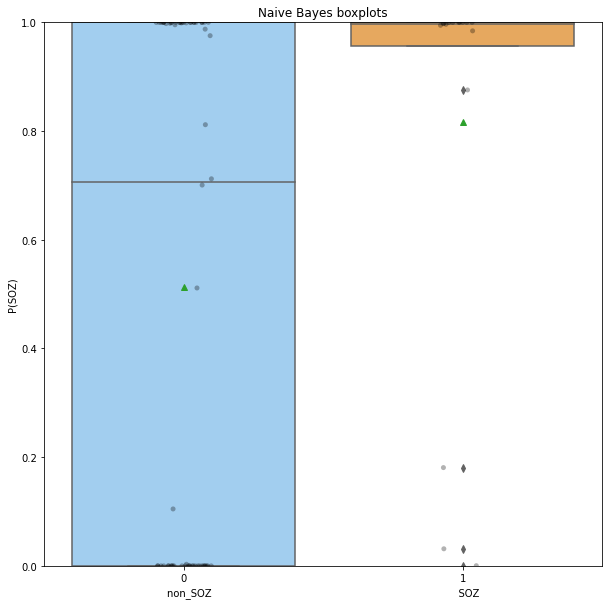

In [81]:
#Naive Bayes

gnb, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = naive_bayes(all_positive_patients, X_list, plot_roc, plot_pr)

# Printing Metrics
optimal_thresh = roc_thresholds[np.argmax(tpr - fpr)]
print("Optimal roc threshold: ", optimal_thresh)
y_rounded = np.where(y_pred > optimal_thresh, 1, 0)

tn, fp, fn, tp = confusion_matrix(y_test, y_rounded).ravel()

print("Accuracy: ", (tp + tn)/(tp + fp + tn + fn))
print("Sensitivity: ", tp / (tp + fn))
print("Specificity: ", tn / (tn + fp))


# Plotting boxplot
non_epilepsy = []
channels_non = []
epilepsy_normal = []
channels_normal = []

i = 0
while i < len(y_test):
    if list(y_test)[i] == 1.0:
        epilepsy_normal.append(y_pred[i])
        channels_normal.append(test_channels[i])
    elif list(y_test)[i] == 0.0:
        non_epilepsy.append(y_pred[i])
        channels_non.append(test_channels[i])
    i += 1
    
channels_normal = [x for _,x in sorted(zip(epilepsy_normal, channels_normal), reverse = True)]

pos_labels = []
for channel in channels_normal:
    channel = ''.join(i for i in channel if not i.isdigit()) #dropping digits from channel name
    channel_split = channel.split("_")
    for key in node_location.keys():
        if (channel_split[0] == key) | (channel_split[1] == key):
            pos_labels.append(node_location[key])

neg_labels = []
for channel in channels_non:
    channel = ''.join(i for i in channel if not i.isdigit()) #dropping digits from channel name
    channel_split = channel.split("_")
    for key in node_location.keys():
        if (channel_split[0] == key) | (channel_split[1] == key):
            neg_labels.append(node_location[key])

print("\n")
print("Positive labels")            
print(*pos_labels, sep = "\n")

print("\n")
print("Negative labels")
print(*neg_labels, sep = "\n")

    
plt.figure(figsize = (10, 10))
plt.title("Naive Bayes boxplots")
plt.xlabel("non_SOZ                                                                               SOZ")
plt.ylabel("P(SOZ)")
plt.ylim([0,1])

sns.boxplot(
    data=[non_epilepsy, epilepsy_normal],
    palette=[sns.xkcd_rgb["light blue"], sns.xkcd_rgb["light orange"]],
    showmeans=True,
)

sns.stripplot(
    color = 'black',
    alpha = 0.3, 
    data=[non_epilepsy, epilepsy_normal],
)


## Random Forest

Random Forest - Number of mislabeled points out of a total 78 points : 15
Optimal roc threshold:  0.19
Accuracy:  0.7948717948717948
Sensitivity:  0.75
Specificity:  0.8064516129032258


Positive labels
Left fronto-temporal grid
Left fronto-temporal grid
Right anterior temporal inferior
Left inferior posterior frontal depth
left basal temporal
Left temporal grid
Right anterior hippocampus
Right anterior hippocampus
Left orbitofrontal depth
Left inferior frontal
Left medial frontal depth
Right anterior hippocampus
Right amygdala depth
right posterior hippocampus
Right anterior temporal inferior
Left fronto-temporal grid


Negative labels
left posterior hippocampus
Left amygdala depth
Left lateral lesion 2
Basal temporal posterior-temporal
Left posterior nodule depth
Right medial superior (medial)
Left retro-splenial cingulate
Left anterior superior temporal gyrus
Left amygdala depth
Left fronto-temporal grid
Basal temporal mid-temporal
Left insula
right posterior hippocampus
Left fronta

<AxesSubplot:title={'center':'Random Forest boxplots'}, xlabel='non_SOZ                                                                               SOZ', ylabel='P(SOZ)'>

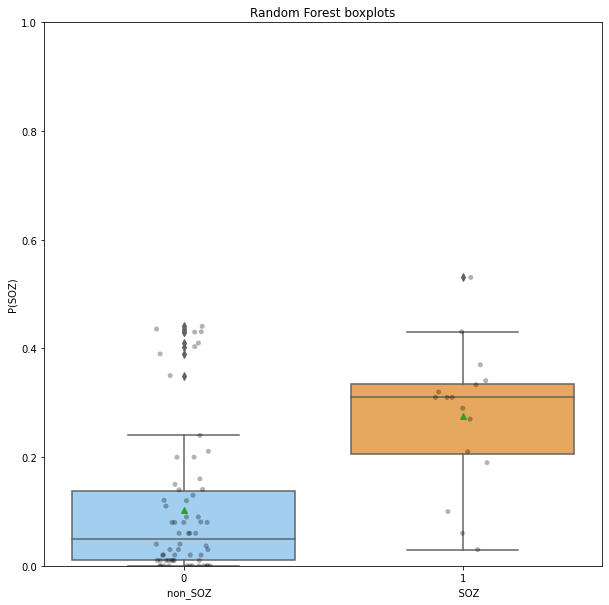

In [82]:
#Random Forest

max_depth = 10
rf, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = random_forest(all_positive_patients, X_list, max_depth, plot_roc, plot_pr)

# Printing Metrics
optimal_thresh = roc_thresholds[np.argmax(tpr - fpr)]
print("Optimal roc threshold: ", optimal_thresh)
y_rounded = np.where(y_pred > optimal_thresh, 1, 0)

tn, fp, fn, tp = confusion_matrix(y_test, y_rounded).ravel()

print("Accuracy: ", (tp + tn)/(tp + fp + tn + fn))
print("Sensitivity: ", tp / (tp + fn))
print("Specificity: ", tn / (tn + fp))


# Plotting boxplot
non_epilepsy = []
channels_non = []
epilepsy_normal = []
channels_normal = []

i = 0
while i < len(y_test):
    if list(y_test)[i] == 1.0:
        epilepsy_normal.append(y_pred[i])
        channels_normal.append(test_channels[i])
    elif list(y_test)[i] == 0.0:
        non_epilepsy.append(y_pred[i])
        channels_non.append(test_channels[i])
    i += 1
    
channels_normal = [x for _,x in sorted(zip(epilepsy_normal, channels_normal), reverse = True)]

pos_labels = []
for channel in channels_normal:
    channel = ''.join(i for i in channel if not i.isdigit()) #dropping digits from channel name
    channel_split = channel.split("_")
    for key in node_location.keys():
        if (channel_split[0] == key) | (channel_split[1] == key):
            pos_labels.append(node_location[key])

neg_labels = []
for channel in channels_non:
    channel = ''.join(i for i in channel if not i.isdigit()) #dropping digits from channel name
    channel_split = channel.split("_")
    for key in node_location.keys():
        if (channel_split[0] == key) | (channel_split[1] == key):
            neg_labels.append(node_location[key])

print("\n")
print("Positive labels")            
print(*pos_labels, sep = "\n")

print("\n")
print("Negative labels")
print(*neg_labels, sep = "\n")

    
plt.figure(figsize = (10, 10))
plt.title("Random Forest boxplots")
plt.xlabel("non_SOZ                                                                               SOZ")
plt.ylabel("P(SOZ)")
plt.ylim([0,1])

sns.boxplot(
    data=[non_epilepsy, epilepsy_normal],
    palette=[sns.xkcd_rgb["light blue"], sns.xkcd_rgb["light orange"]],
    showmeans=True,
)

sns.stripplot(
    color = 'black',
    alpha = 0.3, 
    data=[non_epilepsy, epilepsy_normal],
)


## XGBoost

[23:59:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:59:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost - Number of mislabeled points out of a total 78 points : 15
Optimal roc threshold:  0.023420572
Accuracy:  0.6282051282051282
Sensitivity:  0.875
Specificity:  0.5645161290322581


Positive labels
Right anterior hippocampus
Left fronto-temporal grid
Right anterior temporal inferior
Left temporal grid
Right anterior hippocampus
Left orbitofrontal depth
Left medial frontal depth
Left inferior posterior frontal depth
Right amygdala depth
Left fronto-temporal grid
left basal temporal
Lef

/Users/shrey2/opt/anaconda3/envs/pcm/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


<AxesSubplot:title={'center':'XGBoost boxplots'}, xlabel='non_SOZ                                                                               SOZ', ylabel='P(SOZ)'>

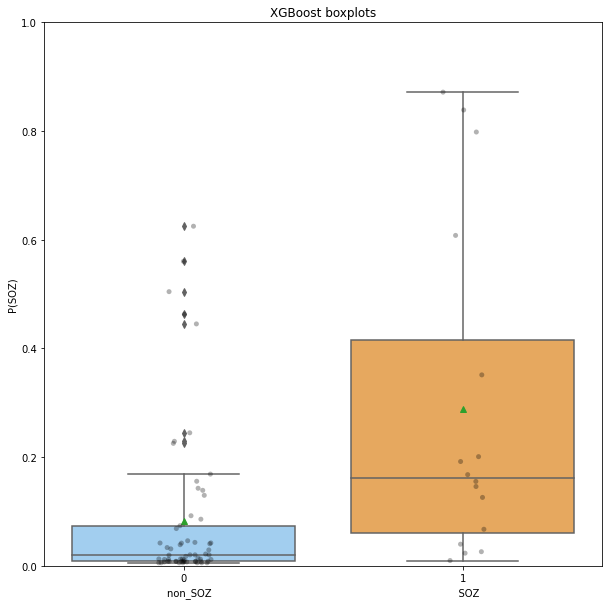

In [83]:
#XGBoost

learning_rate = 0.5
max_depth = 10
n_estimators = 10
xgb, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = xgboost(all_positive_patients, X_list, learning_rate, max_depth, n_estimators, plot_roc, plot_pr)

# Printing Metrics
optimal_thresh = roc_thresholds[np.argmax(tpr - fpr)]
print("Optimal roc threshold: ", optimal_thresh)
y_rounded = np.where(y_pred > optimal_thresh, 1, 0)

tn, fp, fn, tp = confusion_matrix(y_test, y_rounded).ravel()

print("Accuracy: ", (tp + tn)/(tp + fp + tn + fn))
print("Sensitivity: ", tp / (tp + fn))
print("Specificity: ", tn / (tn + fp))



# Plotting boxplot
non_epilepsy = []
channels_non = []
epilepsy_normal = []
channels_normal = []

i = 0
while i < len(y_test):
    if list(y_test)[i] == 1.0:
        epilepsy_normal.append(y_pred[i])
        channels_normal.append(test_channels[i])
    elif list(y_test)[i] == 0.0:
        non_epilepsy.append(y_pred[i])
        channels_non.append(test_channels[i])
    i += 1
    
channels_normal = [x for _,x in sorted(zip(epilepsy_normal, channels_normal), reverse = True)]

pos_labels = []
for channel in channels_normal:
    channel = ''.join(i for i in channel if not i.isdigit()) #dropping digits from channel name
    channel_split = channel.split("_")
    for key in node_location.keys():
        if (channel_split[0] == key) | (channel_split[1] == key):
            pos_labels.append(node_location[key])

neg_labels = []
for channel in channels_non:
    channel = ''.join(i for i in channel if not i.isdigit()) #dropping digits from channel name
    channel_split = channel.split("_")
    for key in node_location.keys():
        if (channel_split[0] == key) | (channel_split[1] == key):
            neg_labels.append(node_location[key])

print("\n")
print("Positive labels")            
print(*pos_labels, sep = "\n")

print("\n")
print("Negative labels")
print(*neg_labels, sep = "\n")

    
plt.figure(figsize = (10, 10))
plt.title("XGBoost boxplots")
plt.xlabel("non_SOZ                                                                               SOZ")
plt.ylabel("P(SOZ)")
plt.ylim([0,1])

sns.boxplot(
    data=[non_epilepsy, epilepsy_normal],
    palette=[sns.xkcd_rgb["light blue"], sns.xkcd_rgb["light orange"]],
    showmeans=True,
)

sns.stripplot(
    color = 'black',
    alpha = 0.3, 
    data=[non_epilepsy, epilepsy_normal],
)


## Adaboost

Adaboost - Number of mislabeled points out of a total 78 points : 14
Optimal roc threshold:  0.41970837037433173
Accuracy:  0.7435897435897436
Sensitivity:  0.625
Specificity:  0.7741935483870968


Positive labels
Right amygdala depth
Right anterior hippocampus
Right anterior temporal inferior
Left inferior posterior frontal depth
Left fronto-temporal grid
Left fronto-temporal grid
Left inferior frontal
Right anterior hippocampus
Left temporal grid
Left orbitofrontal depth
Right anterior hippocampus
left basal temporal
right posterior hippocampus
Right anterior temporal inferior
Left fronto-temporal grid
Left medial frontal depth


Negative labels
left posterior hippocampus
Left amygdala depth
Left lateral lesion 2
Basal temporal posterior-temporal
Left posterior nodule depth
Right medial superior (medial)
Left retro-splenial cingulate
Left anterior superior temporal gyrus
Left amygdala depth
Left fronto-temporal grid
Basal temporal mid-temporal
Left insula
right posterior hippocampus


<AxesSubplot:title={'center':'Adaboost boxplots'}, xlabel='non_SOZ                                                                               SOZ', ylabel='P(SOZ)'>

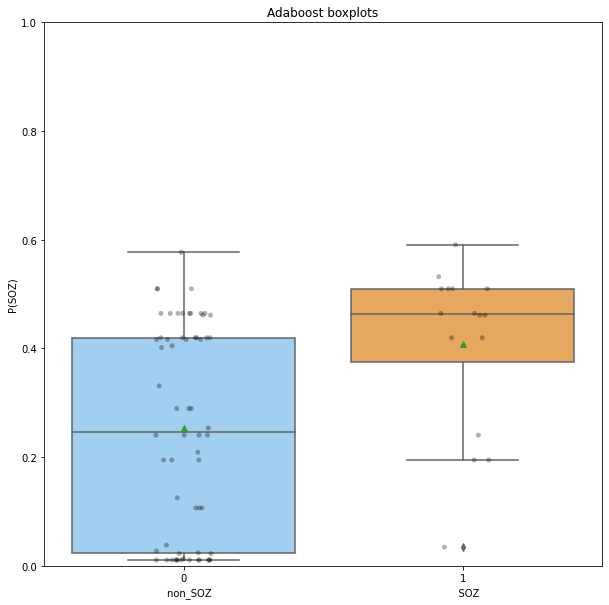

In [84]:
#Adaboost

n_estimators = 10
ada, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = adaboost(all_positive_patients, X_list, n_estimators, plot_roc, plot_pr)

# Printing Metrics
optimal_thresh = roc_thresholds[np.argmax(tpr - fpr)]
print("Optimal roc threshold: ", optimal_thresh)
y_rounded = np.where(y_pred > optimal_thresh, 1, 0)

tn, fp, fn, tp = confusion_matrix(y_test, y_rounded).ravel()

print("Accuracy: ", (tp + tn)/(tp + fp + tn + fn))
print("Sensitivity: ", tp / (tp + fn))
print("Specificity: ", tn / (tn + fp))


# Plotting boxplot
non_epilepsy = []
channels_non = []
epilepsy_normal = []
channels_normal = []

i = 0
while i < len(y_test):
    if list(y_test)[i] == 1.0:
        epilepsy_normal.append(y_pred[i])
        channels_normal.append(test_channels[i])
    elif list(y_test)[i] == 0.0:
        non_epilepsy.append(y_pred[i])
        channels_non.append(test_channels[i])
    i += 1
    
channels_normal = [x for _,x in sorted(zip(epilepsy_normal, channels_normal), reverse = True)]

pos_labels = []
for channel in channels_normal:
    channel = ''.join(i for i in channel if not i.isdigit()) #dropping digits from channel name
    channel_split = channel.split("_")
    for key in node_location.keys():
        if (channel_split[0] == key) | (channel_split[1] == key):
            pos_labels.append(node_location[key])

neg_labels = []
for channel in channels_non:
    channel = ''.join(i for i in channel if not i.isdigit()) #dropping digits from channel name
    channel_split = channel.split("_")
    for key in node_location.keys():
        if (channel_split[0] == key) | (channel_split[1] == key):
            neg_labels.append(node_location[key])

print("\n")
print("Positive labels")            
print(*pos_labels, sep = "\n")

print("\n")
print("Negative labels")
print(*neg_labels, sep = "\n")

    
plt.figure(figsize = (10, 10))
plt.title("Adaboost boxplots")
plt.xlabel("non_SOZ                                                                               SOZ")
plt.ylabel("P(SOZ)")
plt.ylim([0,1])

sns.boxplot(
    data=[non_epilepsy, epilepsy_normal],
    palette=[sns.xkcd_rgb["light blue"], sns.xkcd_rgb["light orange"]],
    showmeans=True,
)

sns.stripplot(
    color = 'black',
    alpha = 0.3, 
    data=[non_epilepsy, epilepsy_normal],
)


## SVM

SVM - Number of mislabeled points out of a total 78 points : 16
Optimal roc threshold:  0.19644165801490618
Accuracy:  0.6923076923076923
Sensitivity:  0.625
Specificity:  0.7096774193548387


Positive labels
Right amygdala depth
Left orbitofrontal depth
Left fronto-temporal grid
Left temporal grid
Left medial frontal depth
left basal temporal
Left inferior posterior frontal depth
Left fronto-temporal grid
Right anterior hippocampus
right posterior hippocampus
Right anterior hippocampus
Left fronto-temporal grid
Right anterior hippocampus
Right anterior temporal inferior
Left inferior frontal
Right anterior temporal inferior


Negative labels
left posterior hippocampus
Left amygdala depth
Left lateral lesion 2
Basal temporal posterior-temporal
Left posterior nodule depth
Right medial superior (medial)
Left retro-splenial cingulate
Left anterior superior temporal gyrus
Left amygdala depth
Left fronto-temporal grid
Basal temporal mid-temporal
Left insula
right posterior hippocampus
Left 

<AxesSubplot:title={'center':'SVM boxplots'}, xlabel='non_SOZ                                                                               SOZ', ylabel='P(SOZ)'>

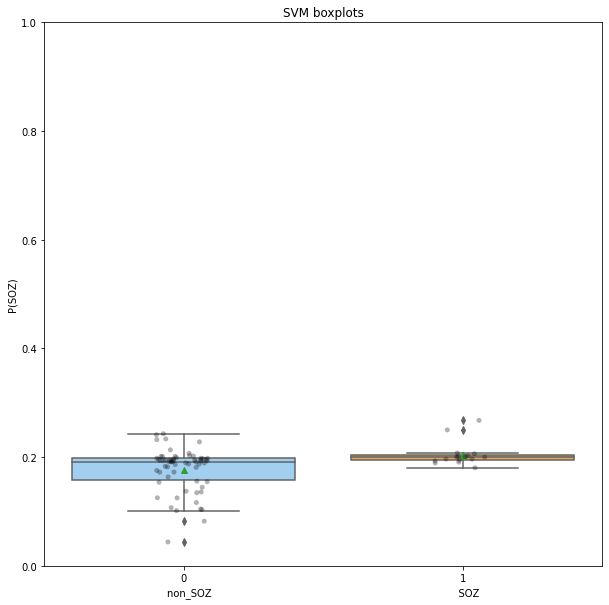

In [85]:
#SVM

C = 0.7
epsilon = 0.2
sv, test_channels, y_pred, y_test, tpr, fpr, roc_thresholds, precision, recall = svm(all_positive_patients, X_list, C, epsilon, plot_roc, plot_pr)

# Printing Metrics
optimal_thresh = roc_thresholds[np.argmax(tpr - fpr)]
print("Optimal roc threshold: ", optimal_thresh)
y_rounded = np.where(y_pred > optimal_thresh, 1, 0)

tn, fp, fn, tp = confusion_matrix(y_test, y_rounded).ravel()

print("Accuracy: ", (tp + tn)/(tp + fp + tn + fn))
print("Sensitivity: ", tp / (tp + fn))
print("Specificity: ", tn / (tn + fp))


# Plotting boxplot
non_epilepsy = []
channels_non = []
epilepsy_normal = []
channels_normal = []

i = 0
while i < len(y_test):
    if list(y_test)[i] == 1.0:
        epilepsy_normal.append(y_pred[i])
        channels_normal.append(test_channels[i])
    elif list(y_test)[i] == 0.0:
        non_epilepsy.append(y_pred[i])
        channels_non.append(test_channels[i])
    i += 1
    
channels_normal = [x for _,x in sorted(zip(epilepsy_normal, channels_normal), reverse = True)]

pos_labels = []
for channel in channels_normal:
    channel = ''.join(i for i in channel if not i.isdigit()) #dropping digits from channel name
    channel_split = channel.split("_")
    for key in node_location.keys():
        if (channel_split[0] == key) | (channel_split[1] == key):
            pos_labels.append(node_location[key])

neg_labels = []
for channel in channels_non:
    channel = ''.join(i for i in channel if not i.isdigit()) #dropping digits from channel name
    channel_split = channel.split("_")
    for key in node_location.keys():
        if (channel_split[0] == key) | (channel_split[1] == key):
            neg_labels.append(node_location[key])

print("\n")
print("Positive labels")            
print(*pos_labels, sep = "\n")

print("\n")
print("Negative labels")
print(*neg_labels, sep = "\n")

    
plt.figure(figsize = (10, 10))
plt.title("SVM boxplots")
plt.xlabel("non_SOZ                                                                               SOZ")
plt.ylabel("P(SOZ)")
plt.ylim([0,1])

sns.boxplot(
    data=[non_epilepsy, epilepsy_normal],
    palette=[sns.xkcd_rgb["light blue"], sns.xkcd_rgb["light orange"]],
    showmeans=True,
)

sns.stripplot(
    color = 'black',
    alpha = 0.3, 
    data=[non_epilepsy, epilepsy_normal],
)
